In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import anndata
import scanpy as sc

# With PKD

In [2]:
control = pd.read_csv('/exports/humgen/cnovellarausell/SevtapSpatial/outputs/tangram_outputs_with_PKD/control_v1_sample_healthyMKA/Control_celltype_counts_denoised_zimmermanhumphreysmuto_highres.csv')
pkd_1 = pd.read_csv('/exports/humgen/cnovellarausell/SevtapSpatial/outputs/tangram_outputs_with_PKD/pkd_1_v1/pkd_1_celltype_counts_denoised_zimmermanhumphreysmuto_highres.csv')
pkd_2 = pd.read_csv('/exports/humgen/cnovellarausell/SevtapSpatial/outputs/tangram_outputs_with_PKD/pkd_2_v1/pkd_2_celltype_counts_denoised_zimmermanhumphreysmuto_highres.csv')
pkd_3 = pd.read_csv('/exports/humgen/cnovellarausell/SevtapSpatial/outputs/tangram_outputs_with_PKD/pkd_3_v1/pkd_3_celltype_counts_denoised_zimmermanhumphreysmuto_highres.csv')

In [3]:
control['library'] = ['Control'] * len(control)
pkd_1['library'] = ['pkd_1'] * len(pkd_1)
pkd_2['library'] = ['pkd_2'] * len(pkd_2)
pkd_3['library'] = ['pkd_3'] * len(pkd_3)

In [4]:
low_res = {
'Immune': ['Neutro', 'NK', 'Macro', 'NKT1', 'B lymph', 'B1 B lymph', 'T lymph', 'DC', 'Lyc6 low Macrophages', 'Lyc6 high Macrophages','Spp1+ Resident Macrophages ', 'Mrc1+ Resident Macrophages', 'Gzma+ NK','CD4+ Th17', 'CD4+ T regs', 'B1 B lymph', 'T3/Follicular B lymph', 'T1 B lymph', 'Gzma low NK', 'CD4+ T lymph', 'Gzma+ CD8+ T lymph', 'Memory B lymph'],
'Endo': ['Endo', 'Glom-Endo', 'Asc-Vasa-Recta', 'Vas-Efferens', 'Desc-Vasa-Recta', 'Vas-Afferens'],
'PT': ['PTS1', 'PTS2', 'PTS3', 'PTS3T2'],
'LOH': ['TAL', 'ATL', 'DTL', 'DTL-ATL'],
'DCT': ['DCT', 'DCT-CNT'],
'Fib': ['Fib', 'Myofib']}
low_res_rev = {vs: k for k, v in low_res.items() for vs in v}

In [5]:
dfs = [control, pkd_1, pkd_2, pkd_3]
for df in dfs:
    mask = df['cell_type'].isin([x for xs in low_res.values() for x in xs])
    df['low_res_cell_type'] = df[mask]['cell_type'].replace(low_res_rev)
    df.low_res_cell_type.fillna(df.cell_type, inplace=True)

/tmp/ipykernel_355579/2155688818.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.low_res_cell_type.fillna(df.cell_type, inplace=True)
/tmp/ipykernel_355579/2155688818.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [6]:
conc = pd.concat([control, pkd_1, pkd_2, pkd_3])

In [7]:
conc['total'] = conc['counts'].groupby(conc['library']).transform('sum')

In [8]:
conc['freq'] = conc['counts'] / conc['total']

In [9]:
conc

,cell_type,counts,library,low_res_cell_type,total,freq
0,PTS1,8582,Control,PT,38621,0.222211
1,PTS3,4864,Control,PT,38621,0.125942
2,PTS2,4120,Control,PT,38621,0.106678
3,TAL,4041,Control,LOH,38621,0.104632
4,DCT,3102,Control,DCT,38621,0.080319
...,...,...,...,...,...,...
45,Gzma+ NK,39,pkd_3,Immune,56280,0.000693
46,Gzma low NK,39,pkd_3,Immune,56280,0.000693
47,B1 B lymph,31,pkd_3,Immune,56280,0.000551
48,Neutro,5,pkd_3,Immune,56280,0.000089


In [10]:
low_res_conc = conc.groupby(['low_res_cell_type', 'library'])['counts'].sum().reset_index(level=[0,1])
low_res_conc['total'] = low_res_conc['counts'].groupby(low_res_conc['library']).transform('sum')
low_res_conc['freq'] = low_res_conc['counts'] / low_res_conc['total']
low_res_conc = low_res_conc.pivot(index='library', columns='low_res_cell_type', values='freq')

In [11]:
low_res_conc

low_res_cell_type,CD-Trans,CNT,DCT,Endo,Fib,ICA,ICB,Immune,LOH,MD,PC,PEC,PT,PT-AcInj,PT-FR,PT-Inj,PT-R,Per,Podo,Trans-PTC
library,,,,,,,,,,,,,,,,,,,,
Control,0.001528,0.018513,0.084099,0.056265,0.005127,0.037751,0.006913,0.100049,0.168302,0.001139,0.038994,0.003004,0.462287,NaN,NaN,NaN,NaN,0.003211,0.012817,NaN
pkd_1,0.001880,0.009156,0.058655,0.046638,0.019252,0.020274,0.007684,0.188719,0.134519,0.001839,0.063765,0.000899,0.406172,0.001104,0.018843,0.007603,0.000450,0.005232,0.006458,0.000858
pkd_2,0.001947,0.009345,0.056224,0.035510,0.039871,0.018066,0.005179,0.225091,0.116419,0.001713,0.065452,0.006035,0.357746,0.000973,0.039442,0.004361,0.001713,0.003660,0.005490,0.005763
pkd_3,0.000906,0.014872,0.066578,0.042573,0.030295,0.022299,0.004762,0.131326,0.150835,0.000782,0.074129,0.003092,0.382445,0.001244,0.044065,0.010803,0.001724,0.002008,0.010590,0.004673


In [12]:
low_res_conc.fillna(0, inplace=True)

In [13]:
low_res_conc.to_excel('/exports/humgen/cnovellarausell/SevtapSpatial/Notebooks/figures-ct-frequencies/withPKD/freqs_lowres_healthyMKA_sample.xlsx')

In [13]:
import pickle as pkl
palette = pkl.load( open( "/exports/archive/hg-groep-peters/Healthy_Mouse_Atlas_Claudio/KidneyAtlas/predicted_celltype_palette_highres_2.pkl", "rb" ) )

In [14]:
palette['Myofib']  = '#963b00'
palette['CD4+ T lymph'] = '#c4bfeb'
palette['Gzma+ CD8+ T lymph'] = '#88bf35'
palette['Memory B lymph'] = '#a691b4'
palette['NKT1'] = '#01a7f4'
palette['Trans-PTC'] = '#321fa0'
palette['PT-FR'] = '#03655c'
palette['PT-R'] = '#059e3f'
palette['PT-AcInj'] = '#615318'
palette['PT-Inj'] = '#fc362f'

In [15]:
low_res_conc = low_res_conc.iloc[::-1]

In [16]:
low_res_conc.columns

Index(['CD-Trans', 'CNT', 'DCT', 'Endo', 'Fib', 'ICA', 'ICB', 'Immune', 'LOH',
       'MD', 'PC', 'PEC', 'PT', 'PT-AcInj', 'PT-FR', 'PT-Inj', 'PT-R', 'Per',
       'Podo', 'Trans-PTC'],
      dtype='object', name='low_res_cell_type')

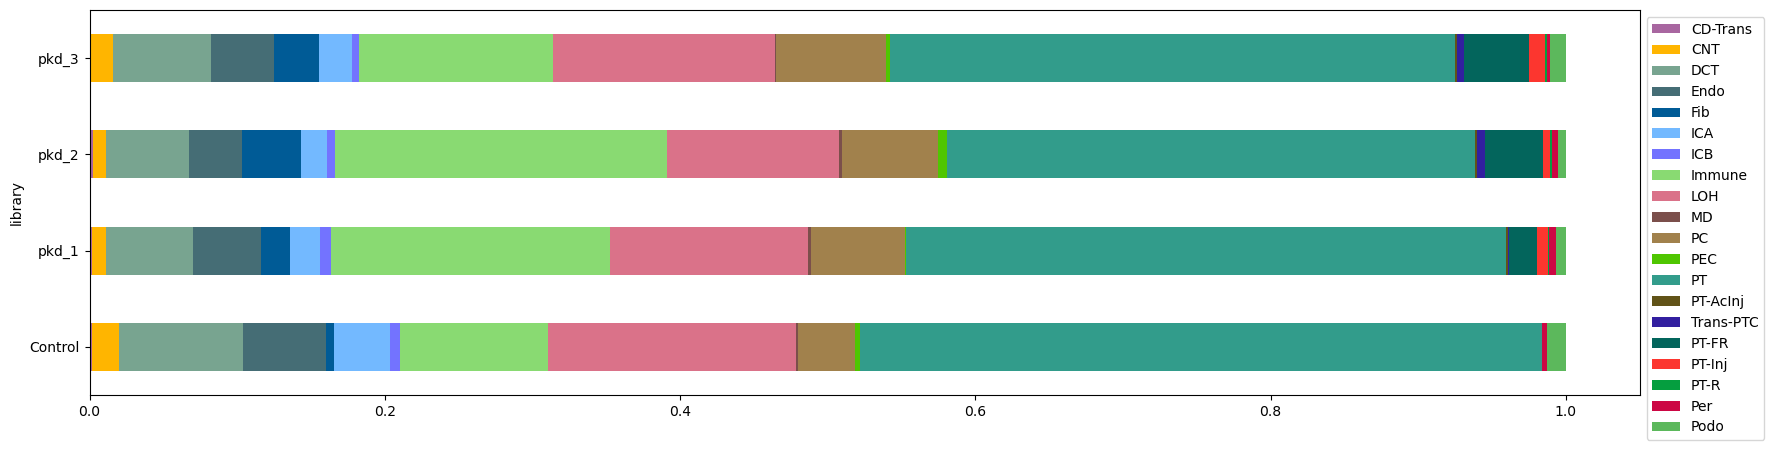

In [18]:
# get current columns
cols = list(low_res_conc.columns)

# define the PT group + where to insert Trans-PTC
pt_group = ["PT", "PT-R", "PT-FR", "PT-Inj", "PT-AcInj"]

# remove Trans-PTC from its current position
cols.remove("Trans-PTC")

# find index of PT group (say right after the last PT cell type)
insert_pos = cols.index("PT-AcInj") + 1

# insert Trans-PTC there
cols = cols[:insert_pos] + ["Trans-PTC"] + cols[insert_pos:]

# reorder dataframe and palette
low_res_conc = low_res_conc[cols]
palette = [palette[c] for c in cols]  # assuming palette is dict-like

# plot again
ax = low_res_conc.iloc[::-1].plot.barh(
    stacked=True, color=palette, grid=False, figsize=(20,5)
)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig(
    '/exports/humgen/cnovellarausell/SevtapSpatial/Notebooks/figures-ct-frequencies/withPKD/freqs_lowres_heatlhyMKA_control_swapped.pdf',
    bbox_inches='tight'
)

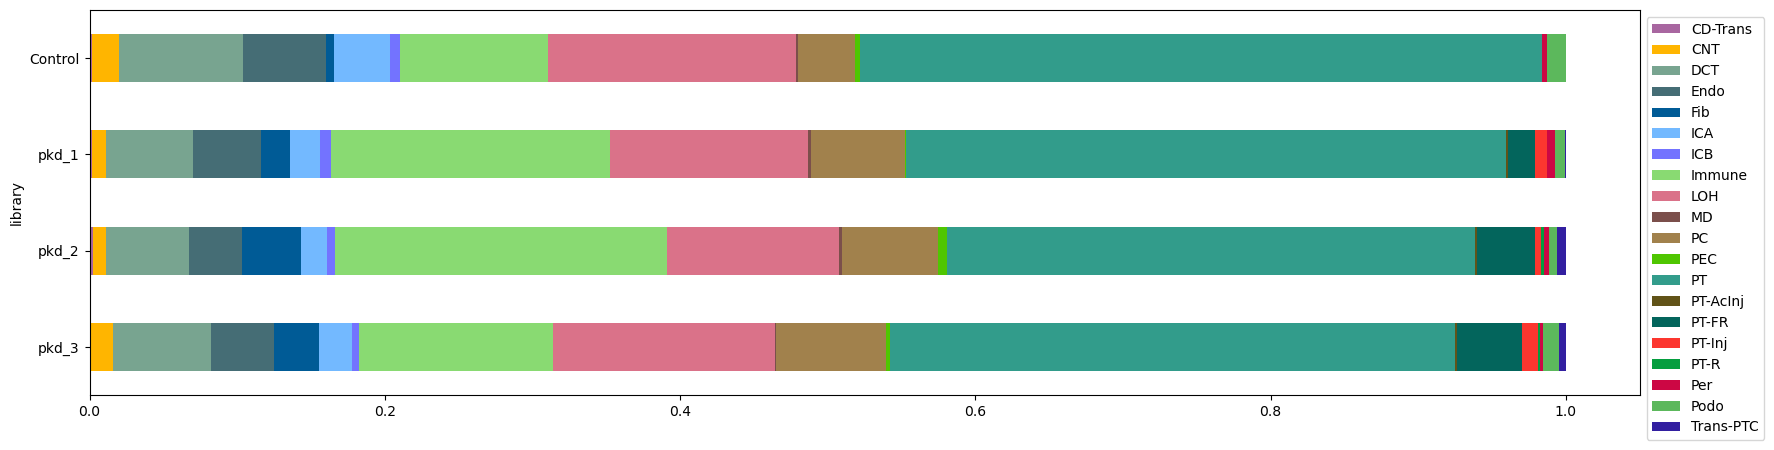

In [15]:
low_res_conc = low_res_conc.iloc[::-1]
low_res_conc.plot.barh(stacked=True, color=palette, grid=False,figsize=(20,5), ).legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('/exports/humgen/cnovellarausell/SevtapSpatial/Notebooks/figures-ct-frequencies/withPKD/freqs_lowres_heatlhyMKA_control.pdf', bbox_inches='tight')

In [17]:
control = pd.read_csv('/exports/humgen/cnovellarausell/SevtapSpatial/outputs/tangram_outputs_with_PKD/control_v1_sample_healthyMKA/Control_celltype_counts_denoised_zimmermanhumphreysmuto_highres.csv')
pkd_1 = pd.read_csv('/exports/humgen/cnovellarausell/SevtapSpatial/outputs/tangram_outputs_with_PKD/pkd_1_v1/pkd_1_celltype_counts_denoised_zimmermanhumphreysmuto_highres.csv')
pkd_2 = pd.read_csv('/exports/humgen/cnovellarausell/SevtapSpatial/outputs/tangram_outputs_with_PKD/pkd_2_v1/pkd_2_celltype_counts_denoised_zimmermanhumphreysmuto_highres.csv')
pkd_3 = pd.read_csv('/exports/humgen/cnovellarausell/SevtapSpatial/outputs/tangram_outputs_with_PKD/pkd_3_v1/pkd_3_celltype_counts_denoised_zimmermanhumphreysmuto_highres.csv')

In [18]:
control.rename({'low_res_cell_type': 'highres_cell_type'}, inplace=True)
pkd_1.rename({'low_res_cell_type': 'highres_cell_type'}, inplace=True)
pkd_2.rename({'low_res_cell_type': 'highres_cell_type'}, inplace=True)
pkd_3.rename({'low_res_cell_type': 'highres_cell_type'}, inplace=True)

In [19]:
control['library'] = ['Control'] * len(control)
pkd_1['library'] = ['pkd_1'] * len(pkd_1)
pkd_2['library'] = ['pkd_2'] * len(pkd_2)
pkd_3['library'] = ['pkd_3'] * len(pkd_3)

In [20]:
low_res = {
#'Immune': ['Neutro', 'Fib', 'NK', 'Macro', 'B lymph', 'T lymph', 'DC'],
'Endo': ['Endo', 'Glom-Endo', 'Asc-Vasa-Recta', 'Vas-Efferens', 'Desc-Vasa-Recta', 'Vas-Afferens'],
'PT': ['PTS1', 'PTS2', 'PTS3', 'PTS3T2'],
'LOH': ['TAL', 'ATL', 'DTL', 'DTL-ATL'],
'DCT': ['DCT', 'DCT-CNT'],
'NK': ['NKT1', 'NK']}

In [21]:
low_res_rev = {vs: k for k, v in low_res.items() for vs in v}

In [22]:
dfs = [control, pkd_1, pkd_2, pkd_3]
for df in dfs:
    mask = df['cell_type'].isin([x for xs in low_res.values() for x in xs])
    df['highres_cell_type'] = df[mask]['cell_type'].replace(low_res_rev)
    df.highres_cell_type.fillna(df.cell_type, inplace=True)

/tmp/ipykernel_355579/537672515.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.highres_cell_type.fillna(df.cell_type, inplace=True)
/tmp/ipykernel_355579/537672515.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [23]:
conc = pd.concat([control, pkd_1, pkd_2, pkd_3])

In [24]:
conc

,cell_type,counts,library,highres_cell_type
0,PTS1,8582,Control,PT
1,PTS3,4864,Control,PT
2,PTS2,4120,Control,PT
3,TAL,4041,Control,LOH
4,DCT,3102,Control,DCT
...,...,...,...,...
45,Gzma+ NK,39,pkd_3,Gzma+ NK
46,Gzma low NK,39,pkd_3,Gzma low NK
47,B1 B lymph,31,pkd_3,B1 B lymph
48,Neutro,5,pkd_3,Neutro


In [25]:
conc['total'] = conc['counts'].groupby(conc['library']).transform('sum')

In [26]:
conc['freq'] = conc['counts'] / conc['total']

In [27]:
low_res_conc = conc.groupby(['highres_cell_type', 'library'])['counts'].sum().reset_index(level=[0,1])
low_res_conc['total'] = low_res_conc['counts'].groupby(low_res_conc['library']).transform('sum')
low_res_conc['freq'] = low_res_conc['counts'] / low_res_conc['total']
low_res_conc = low_res_conc.pivot(index='library', columns='highres_cell_type', values='freq')

In [25]:
low_res_conc.to_excel('/exports/humgen/cnovellarausell/SevtapSpatial/Notebooks/figures-ct-frequencies/withPKD/freqs_highres_healthyMKA_sample.xlsx')

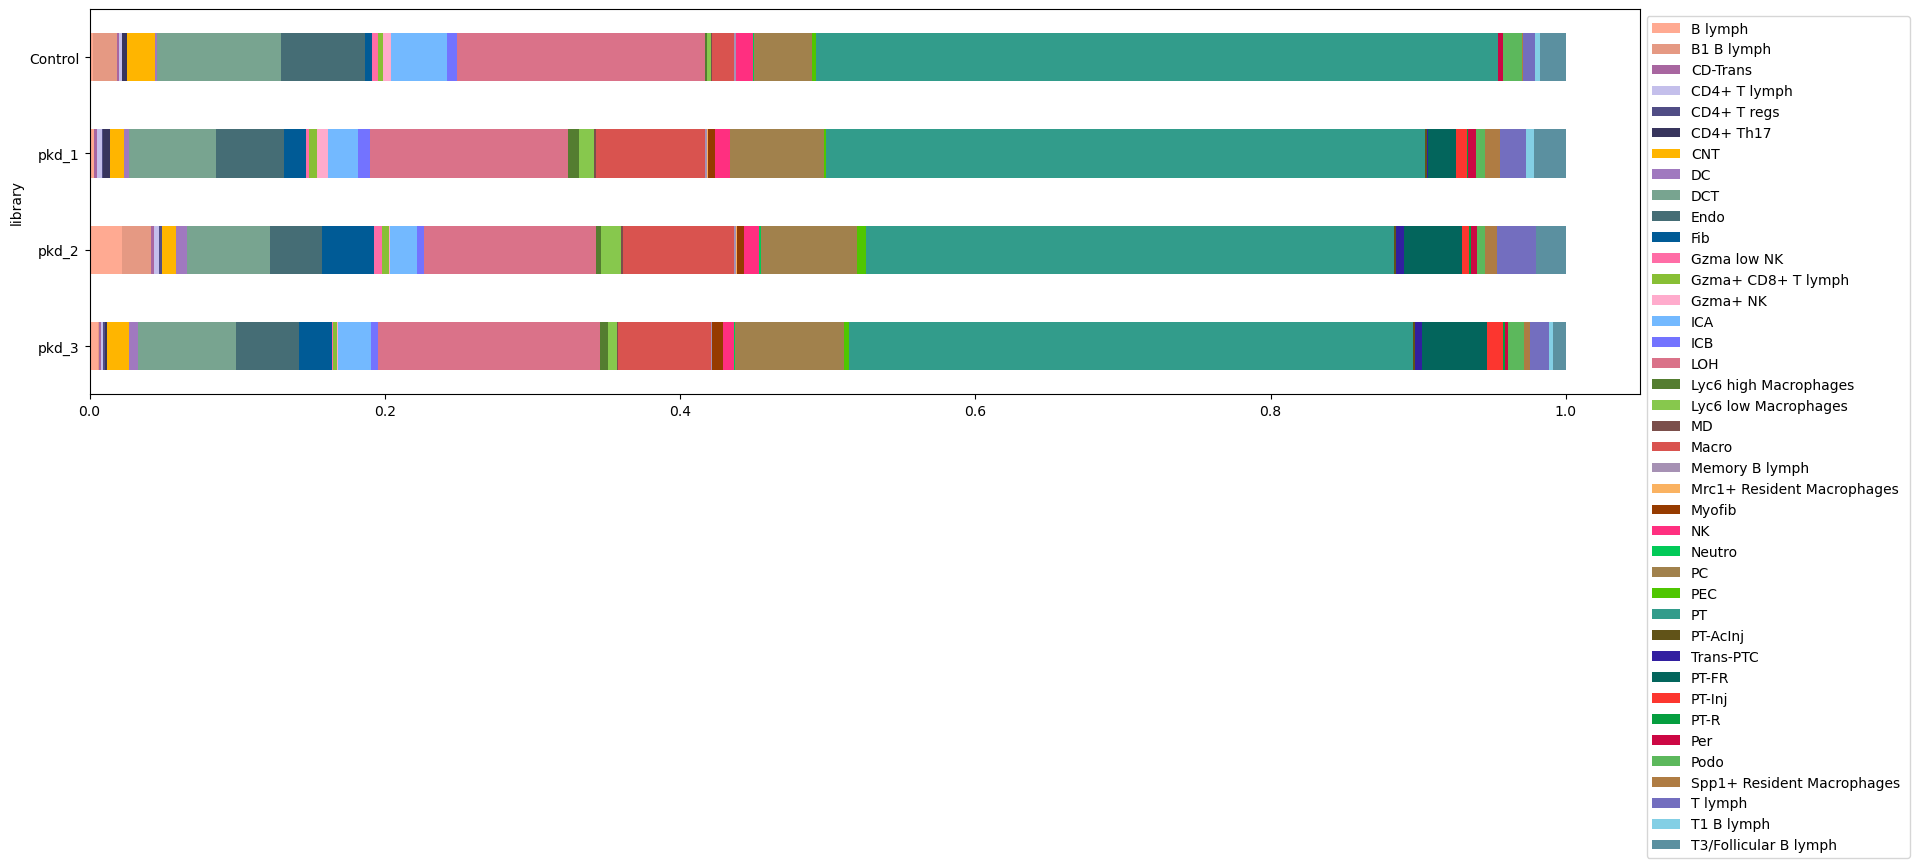

In [28]:
# get current columns
cols = list(low_res_conc.columns)

# define the PT group + where to insert Trans-PTC
pt_group = ["PT", "PT-R", "PT-FR", "PT-Inj", "PT-AcInj"]

# remove Trans-PTC from its current position
cols.remove("Trans-PTC")

# find index of PT group (say right after the last PT cell type)
insert_pos = cols.index("PT-AcInj") + 1

# insert Trans-PTC there
cols = cols[:insert_pos] + ["Trans-PTC"] + cols[insert_pos:]

# reorder dataframe and palette
low_res_conc = low_res_conc[cols]
palette = [palette[c] for c in cols]  # assuming palette is dict-like

# plot again
ax = low_res_conc.iloc[::-1].plot.barh(
    stacked=True, color=palette, grid=False, figsize=(20,5)
)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('/exports/humgen/cnovellarausell/SevtapSpatial/Notebooks/figures-ct-frequencies/withPKD/freqs_highres_healthyMKA_control_swappedTransPT.pdf', bbox_inches='tight')

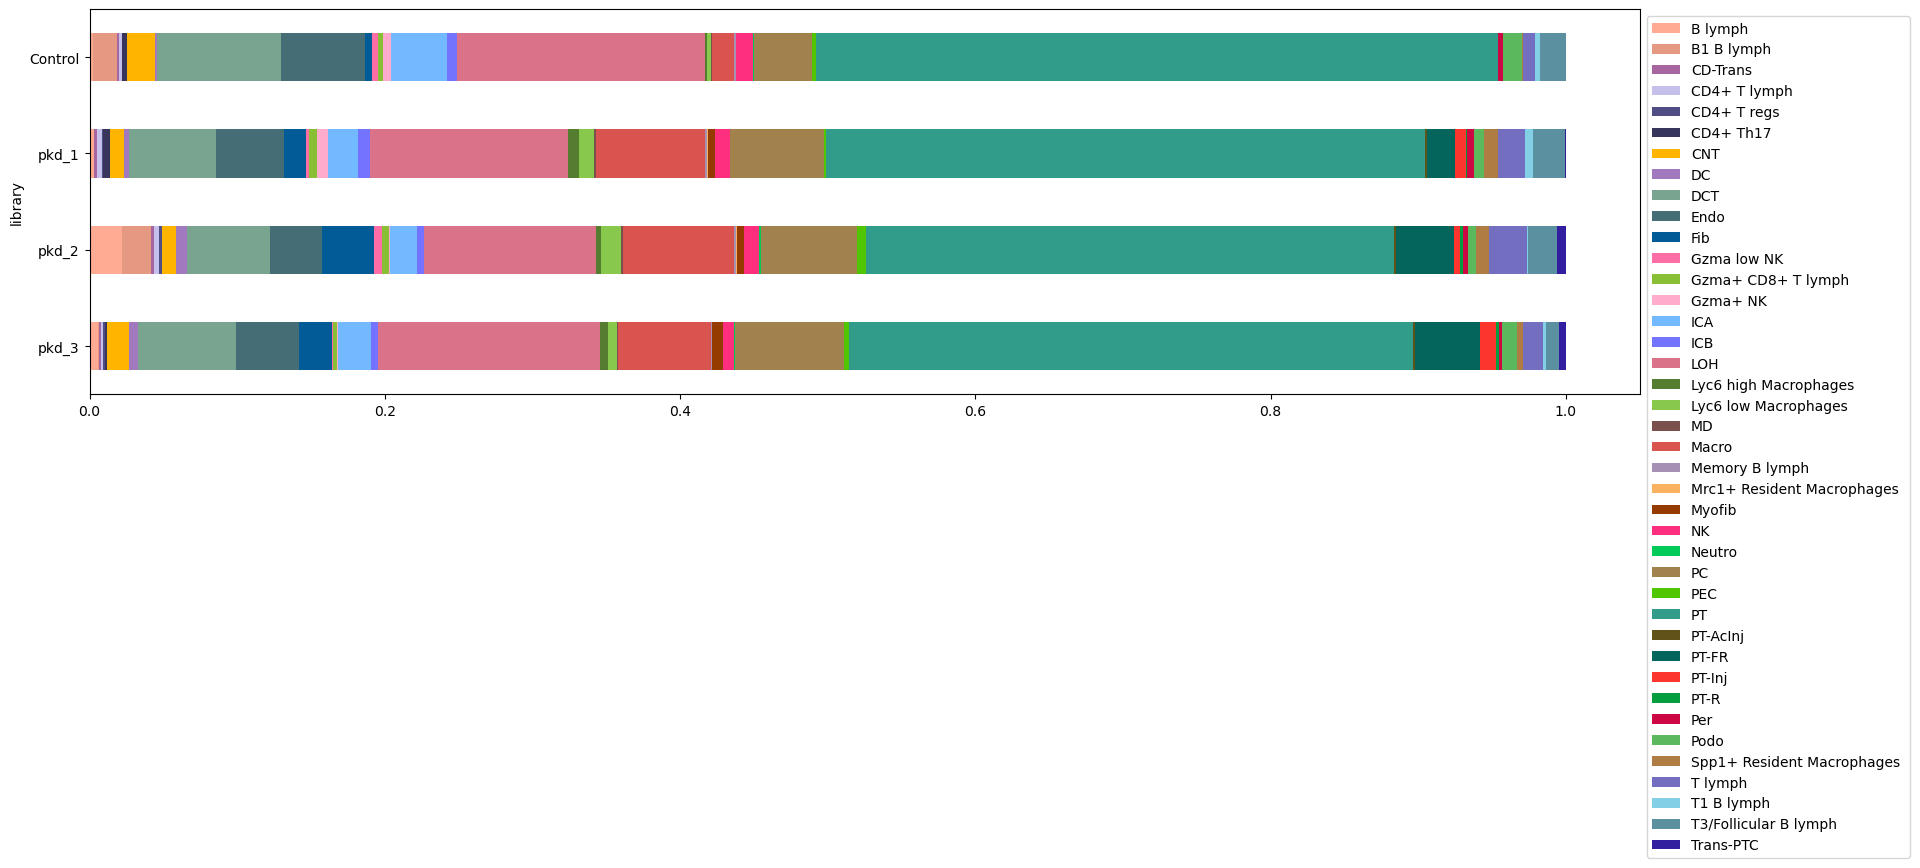

In [27]:
low_res_conc = low_res_conc.iloc[::-1]
low_res_conc.plot.barh(stacked=True, color=palette, grid=False,figsize=(20,5), ).legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('/exports/humgen/cnovellarausell/SevtapSpatial/Notebooks/figures-ct-frequencies/withPKD/freqs_highres_healthyMKA_control.pdf', bbox_inches='tight')